---
# **Problem** **Statement**:
 How severe can an airplane accident be? Flying has been the go-to mode of travel for years now; it is timesaving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mis happenings. However, there remain a few chances of unfortunate incidents. Imagine you have got a project from leading airline. You are required to build Machine Learning models to anticipate and classify the severity of an airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

---

# **Importing the Data File**

This line of code uses the pd.read_csv function from the Pandas library to read data from a CSV (Comma-Separated Values) file into a Pandas DataFrame.

---

In [ ]:
df = pd.read_csv('Airplane_Accident_Data.csv', index_col = 'Accident_ID')

**Converting string outputs into numbers**

In [ ]:
dic = {'Highly_Fatal_And_Damaging':1, 'Minor_Damage_And_Injuries':2, 'Significant_Damage_And_Fatalities':3, 'Significant_Damage_And_Serious_Injuries':4}
df['Severity'] = df['Severity'].map(dic)


The code above is using the map method in Pandas to replace values in the 'Severity' column of the DataFrame (df) based on a dictionary (dic). After running this code, the 'Severity' column in the DataFrame will be transformed, and severity levels will be represented by numerical values according to the mapping specified in the dic dictionary. This kind of transformation is often done to convert categorical data into a format that can be more easily used in machine learning models.

In [ ]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,2,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,2,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,4,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883



---

The df.head() method is used to display the first few rows of a Pandas DataFrame. By default, it shows the first 5 rows, but you can specify the number of rows to display by passing an argument to the method (e.g., df.head(10) to display the first 10 rows).

---

# **Data PreProcessing Steps**
---

In [ ]:
df.dtypes

Severity                     int64
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
dtype: object

The df.dtypes attribute in Pandas is used to display the data types of each column in a DataFrame. When you execute df.dtypes, it returns a Series with the data types of each column as its values.

**Checking Null Values in all columns**

In [ ]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
dtype: int64

The df.isnull().sum() expression is used to calculate the number of missing values (null or NaN values) in each column of a Pandas DataFrame

**Detecting and removing Outliers**

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

The code snippet you provided is extracting subsets of your DataFrame (df) to create feature variables (x) and a target variable (y).

In [ ]:
x.shape

(10000, 10)

The x.shape expression is used to get the dimensions of the DataFrame or NumPy array x. Specifically, it returns a tuple representing the number of rows and columns in x. The first element of the tuple is the number of rows, and the second element is the number of columns.



---



The code below is a series of box plots, each showing the distribution of values in a specific column of the DataFrame for different levels of severity ('Severity'). Each box plot provides a visual summary of the central tendency, spread, and skewness of the data within each severity level. This type of visualization is useful for understanding how different features vary with the target variable ('Severity') and can reveal potential patterns or outliers in the data.

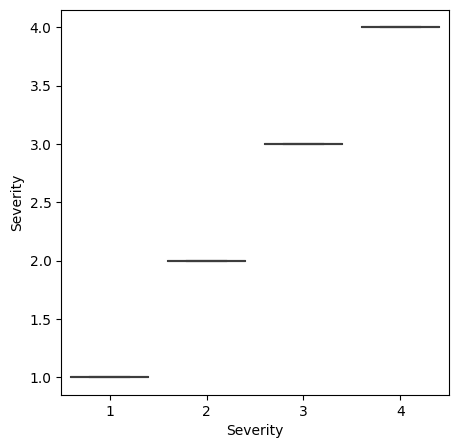

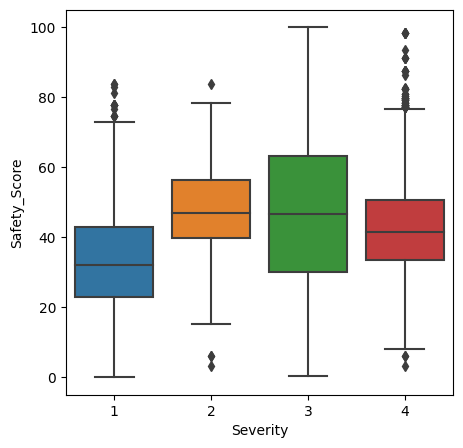

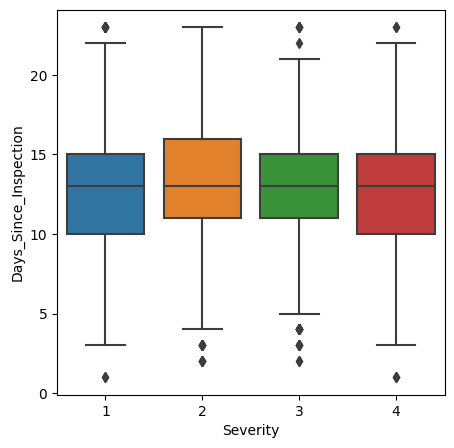

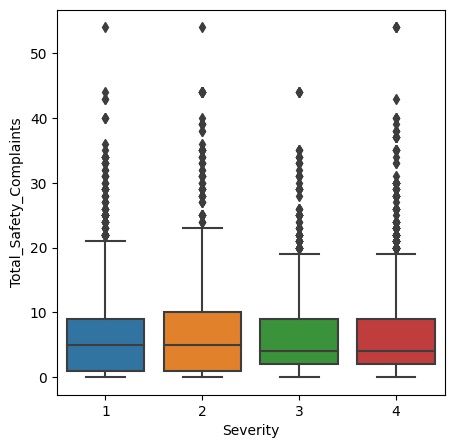

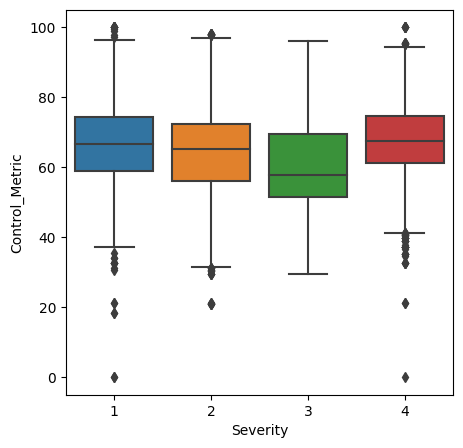

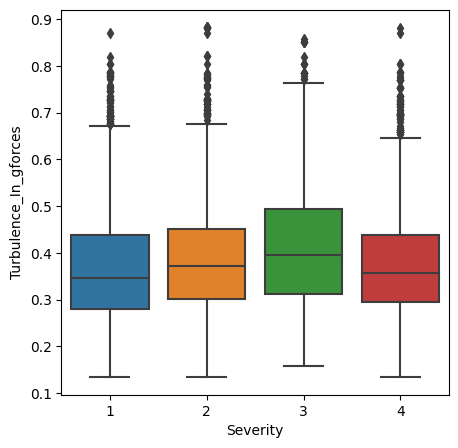

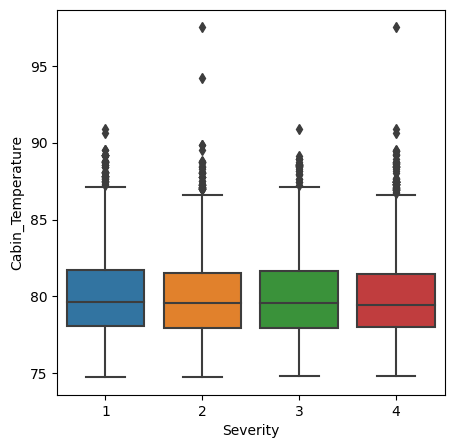

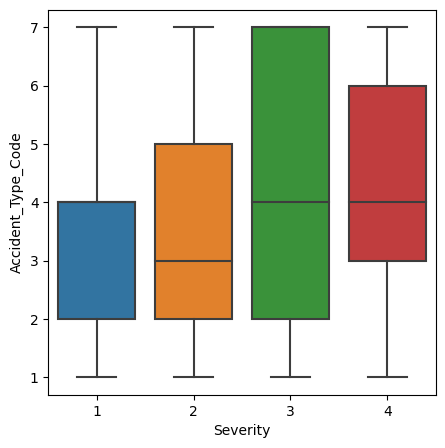

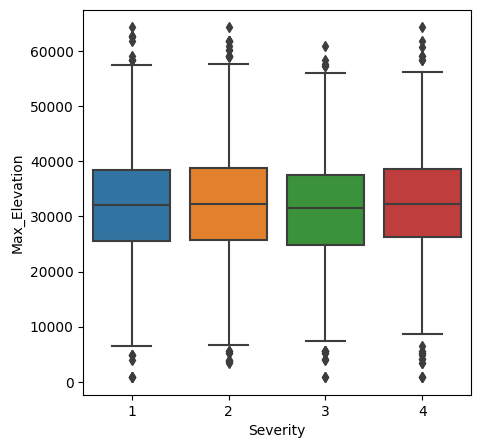

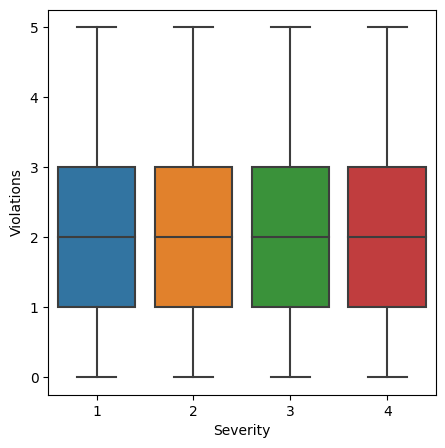

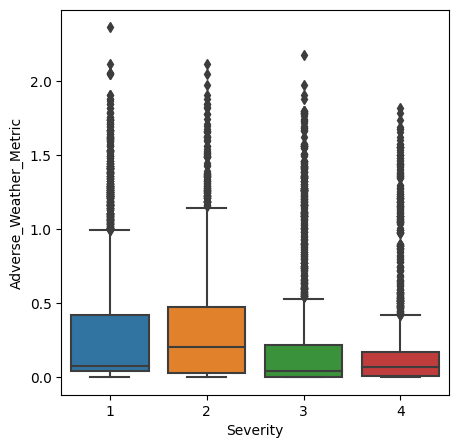

In [ ]:
for col in df:
  plt.figure(figsize = (5,5))
  sns.boxplot(data = df, x='Severity', y = col)
  plt.show()

The z-score (standard score) is a measure of how many standard deviations a data point is from the mean of a dataset. It's calculated using the formula:

(X - u) / SD


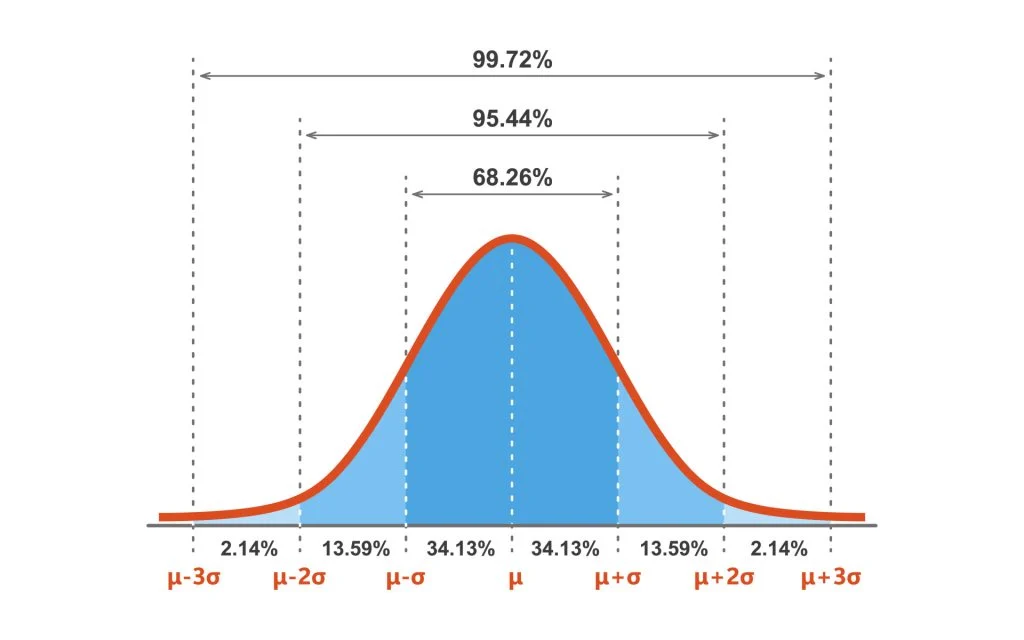


In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(x))
df = df[(z<=3).all(axis = 1)]
z

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,0.455303,0.301981,2.214072,0.516733,0.901749,0.699134,0.953964,0.070649,0.949873,0.442701
12128,1.275888,0.828082,2.931264,0.601122,0.349922,1.656279,0.953964,0.633736,0.011732,0.253773
2181,1.312673,0.019465,1.353442,0.102462,0.485516,0.401990,1.674181,0.770528,0.949873,0.661939
5946,0.384562,0.545566,0.349373,0.804422,0.366593,0.659758,0.428335,1.141883,0.973336,0.115208
9054,0.953841,0.019465,2.644388,1.447221,1.316177,1.018021,0.428335,0.371883,0.011732,0.206638
...,...,...,...,...,...,...,...,...,...,...
11493,0.882573,1.393113,0.798134,0.143033,0.831563,0.481711,0.622923,0.692949,0.011732,0.602151
305,0.093641,0.828082,0.062496,0.250436,0.332084,0.072232,0.097294,0.937824,0.011732,0.474238
612,0.868953,1.149528,0.798134,0.374807,0.521193,0.145191,0.428335,0.187689,0.949873,0.229493


**Feature Selection: Checking the correlation matrix to identify important features**



<Axes: >

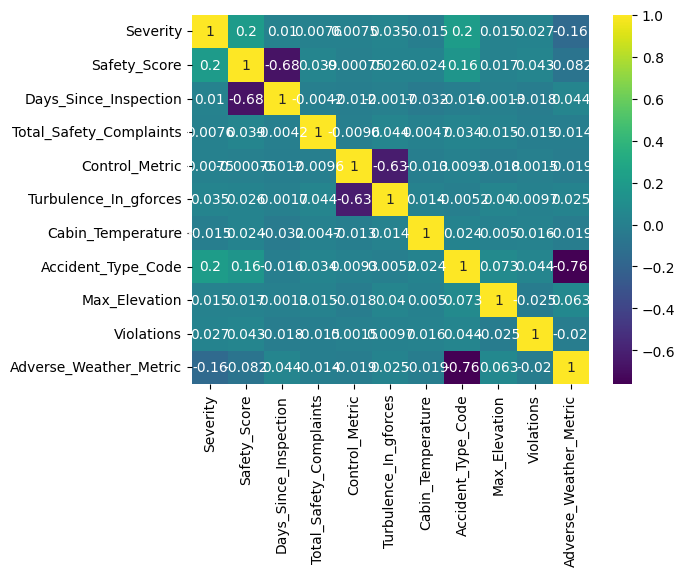

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

The resulting heatmap provides a visual representation of how strongly each pair of variables in the DataFrame is correlated. The color intensity and direction indicate the strength and direction of the correlation, with warmer colors (towards yellow) indicating positive correlations and cooler colors (towards purple) indicating negative correlations.

This type of visualization is useful for identifying patterns and relationships between variables in the dataset. Strong correlations (either positive or negative) might indicate potential multicollinearity or relationships that could be explored further in data analysis.

***Safety Score and Accident Type Code are strongly correlated with the target variable severity
We do not change the skewness here***

In [ ]:
df.skew()

Severity                   0.154172
Safety_Score               0.157770
Days_Since_Inspection     -0.030024
Total_Safety_Complaints    1.206046
Control_Metric            -0.070758
Turbulence_In_gforces      0.619439
Cabin_Temperature          0.666988
Accident_Type_Code         0.253043
Max_Elevation             -0.027664
Violations                 0.091159
Adverse_Weather_Metric     1.927383
dtype: float64

The code df.skew() calculates the skewness of each column in the DataFrame df. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable.

In [ ]:
#Total_Safety_Complaints, Adverse Weather Metric, Cabin Temp and Turbulence need to be adjusted for their skewness as they
#have high skewness and they are least correlated with the target variable

df['Total_Safety_Complaints'] = np.sqrt(df['Total_Safety_Complaints'])
df['Adverse_Weather_Metric'] = np.sqrt(df['Adverse_Weather_Metric'])
df['Cabin_Temperature'] = np.sqrt(df['Cabin_Temperature'])
df['Turbulence_In_gforces'] = np.sqrt(df['Turbulence_In_gforces'])


The code above is applying a square root transformation to specific columns in the DataFrame df. The goal of this transformation is often to address skewness or compress the range of values in a column.

In [ ]:
df.skew()

Severity                   0.154172
Safety_Score               0.157770
Days_Since_Inspection     -0.030024
Total_Safety_Complaints    0.092563
Control_Metric            -0.070758
Turbulence_In_gforces      0.258151
Cabin_Temperature          0.625902
Accident_Type_Code         0.253043
Max_Elevation             -0.027664
Violations                 0.091159
Adverse_Weather_Metric     0.976290
dtype: float64

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x.shape

(9323, 10)

In [ ]:
x.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

The x.columns attribute is used to retrieve the column labels (names) of a DataFrame x. When you run x.columns, it returns a Pandas Index object containing the column names. This can be useful for obtaining a list of column names for further analysis or manipulation.

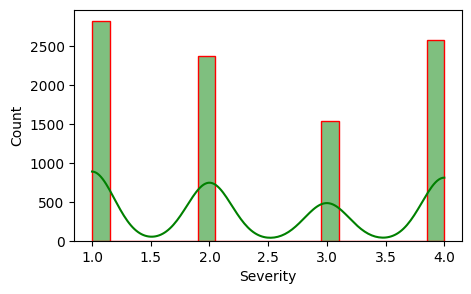

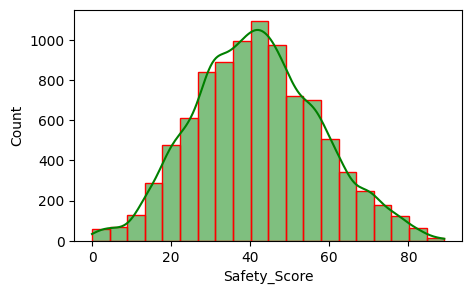

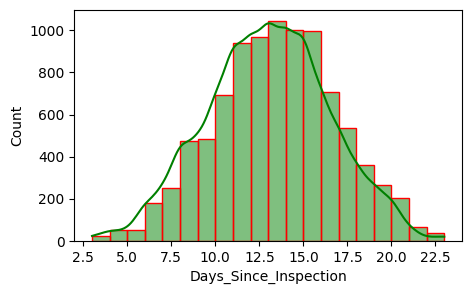

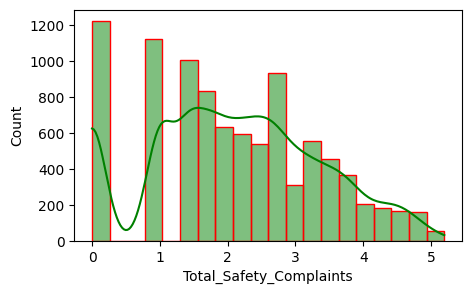

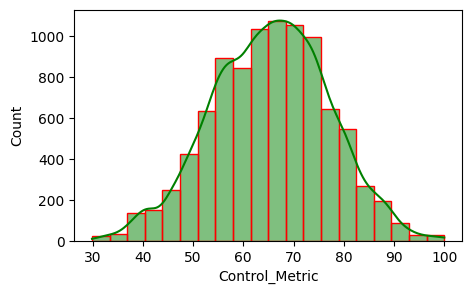

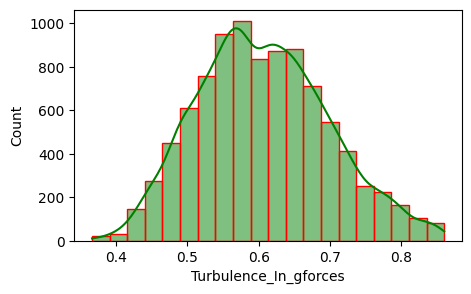

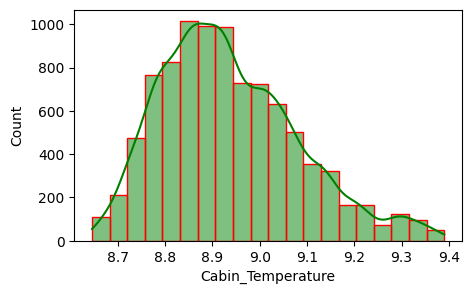

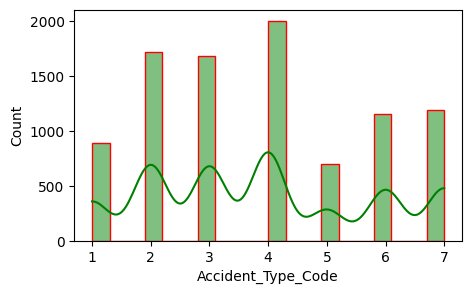

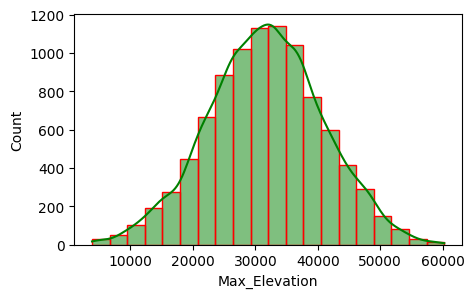

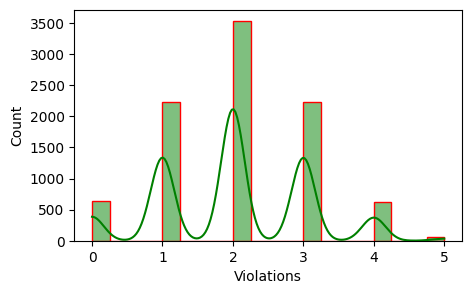

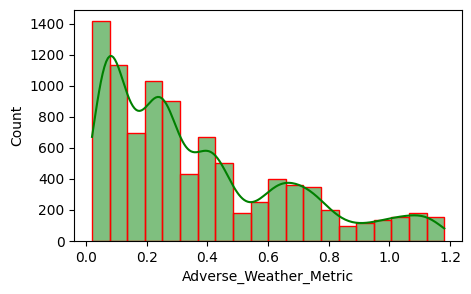

In [ ]:
#Before we proceed, it is better to check the distribution of our data
#We see the kind of values they range from:

for col in df:
  plt.figure(figsize = (5,3))
  sns.histplot(df[col], bins = 20, kde = True, color = 'green', edgecolor = 'red')
  plt.show()

In [ ]:
#dataloss when we removed the outliers using z-score is
dataloss = ((10000 - 9323)/10000)*100
print(f"DataLoss = {dataloss}%")

DataLoss = 6.77%


In [ ]:
#One Final step before proceeding to run different ML Models
#is to check the imbalance in data if any
df['Severity'].value_counts()

1    2829
4    2580
2    2374
3    1540
Name: Severity, dtype: int64

---

In the context of imbalanced datasets, ROS (Random Over-Sampling) and RUS (Random Under-Sampling) are techniques used to address the class imbalance by either increasing the size of the minority class (ROS) or reducing the size of the majority class (RUS). The imbalanced-learn library, commonly known as imblearn, provides implementations for these techniques.



```
from imblearn.over_sampling import RandomOverSampler

from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Over-Sampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Random Under-Sampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

```




---

## Splitting the Data into train and test componenets
---

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

This line applies the train_test_split function to your feature matrix x and target variable y. The function randomly shuffles and splits the data into training and testing sets. The random_state parameter is set to 0 to ensure reproducibility; fixing the random state ensures that the split is the same every time you run the code.


1.   x_train: Training set features.

2.   x_test: Testing set features.

3.   y_train: Training set target variable.

4.   y_test: Testing set target variable.

In [ ]:
#Since the skewness has reduced, we can proceed to scale the extremely large values:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_fit = sc.fit_transform(x_train)
x_test_transform = sc.transform(x_test)

The StandardScaler in scikit-learn is used to standardize features by removing the mean and scaling to unit variance. It's a common preprocessing step in machine learning to ensure that features are on a similar scale, which can be important for certain algorithms, especially those that are distance-based or gradient-based.

Here's why we use StandardScaler:

1. Mean Centering: It subtracts the mean from each feature, ensuring that the transformed features have a mean of 0.

2. Scaling to Unit Variance: It scales the features to have a standard deviation of 1. This helps in situations where features have different units or scales.

3. Preserving Relationship: It ensures that the relationships between features are maintained after scaling. For instance, if two features had a certain relationship (e.g., one is twice the other), standardization will maintain this relationship.

**fit_transform** on Training Data: It is used to compute the mean and standard deviation of each feature in the training data and then perform the transformation. It both calculates the required parameters (mean and standard deviation) and applies the transformation.

**transform** on Testing Data: Once the scaler is fitted on the training data, it is used to transform both the training and testing data. This ensures that the testing data is scaled in the same way as the training data. However, we use transform on the testing data because we do not want the model to learn the parameters by memory


In [ ]:
pred1 = df[df['Severity']==1]
pred2 = df[df['Severity']==2]
pred3 = df[df['Severity']==3]
pred4 = df[df['Severity']==4]

This code below is creating a 3D scatter plot using the matplotlib library, specifically the mpl_toolkits.mplot3d module. The plot represents data from four subsets above (pred1, pred2, pred3, pred4) of the DataFrame, with each subset corresponding to a different severity level of 1, 2, 3 or 4.

In the code below, we are creating a 3D plot to show the relationship between 'Safety_Score', 'Days_Since_Inspection', and 'Control_Metric' for different levels of severity (1, 2, 3, and 4). Each severity level is represented by a different color in the plot.

* The 221 in fig.add_subplot(221, projection='3d') specifies that you want to create a subplot grid with 2 rows and 2 columns, and you're currently working on the first subplot.

* fig = plt.figure(figsize=(10, 10)): Creates a new figure with a specified size.

**Scatter plotting:**

The code creates scatter plots for each severity level using the scatter method of the 3D axis (ax).Data points for each severity level are represented by different colors (c parameter).

Text(0.5, 0, 'Control_Metric')

<Figure size 1000x500 with 0 Axes>

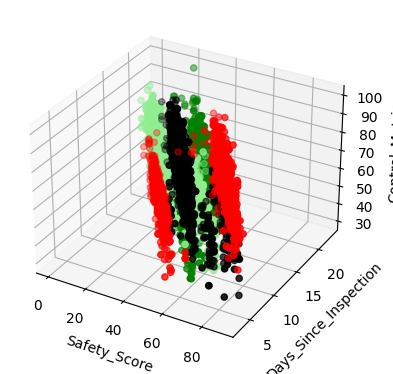

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize = (10,5))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221, projection='3d')

x1 =[pred1['Safety_Score']]
y1 =[pred1['Days_Since_Inspection']]
z1 =[pred1['Control_Metric']]

x2 =[pred2['Safety_Score']]
y2 =[pred2['Days_Since_Inspection']]
z2 =[pred2['Control_Metric']]

x3 =[pred3['Safety_Score']]
y3 =[pred3['Days_Since_Inspection']]
z3 =[pred3['Control_Metric']]

x4 =[pred4['Safety_Score']]
y4 =[pred4['Days_Since_Inspection']]
z4 =[pred4['Control_Metric']]


ax.scatter(x1, y1, z1, c='lightgreen')
ax.scatter(x2, y2, z2, c='green')
ax.scatter(x3, y3, z3, c='red')
ax.scatter(x4, y4, z4, c='black')

ax.set_xlabel('Safety_Score')
ax.set_ylabel('Days_Since_Inspection')
ax.set_zlabel('Control_Metric')

---

# **Model Creation and Testing**
---


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

1. Comparing the default hyperparameters using Cross Validation.
We first add all the machine learning models to a list called models with base parameters set as follows:

In [ ]:
models = [LogisticRegression(max_iter=1000), RandomForestClassifier(random_state=0),GradientBoostingClassifier(random_state = 0), SVC(kernel = 'rbf')]

In [ ]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, x_train_fit, y_train, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

The function above, compare_models_cross_validation(), is designed to compare multiple machine learning models using cross-validation.

For each model, the function performs cross-validation using the cross_val_score function from scikit-learn. This function computes cross-validated scores for each fold and returns an array of accuracy scores.

It then calculates the mean accuracy across the folds, converts it to a percentage, and rounds it to two decimal places.



In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.63259471 0.64689064 0.6323319  0.64520744 0.64878398]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 64.12 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.90922087 0.90636169 0.90128755 0.90915594 0.90128755]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 90.55 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingClassifier(random_state=0) = [0.84917798 0.85847034 0.84191702 0.85622318 0.8583691 ]
Acccuracy score of the  GradientBoostingClassifier(random_state=0) = 85.28 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC() = [0.85418156 0.85203717 0.85407725 0.86337625 0.85765379]
Acccuracy score of the  SVC() = 85.63 %
------------------------------------------------

2. Using GridSearch CV with differet hyperparameters for the best accuracy model from above which is the RandomForest Classifier


In [ ]:
# The code below initializes a RandomForestClassifier model with a specified random state.
# This model will be used as the base model for hyperparameter tuning.
model = RandomForestClassifier(random_state=0)

# The code below defines a dictionary params where the key is the hyperparameter to be
#tuned (n_estimators, which represents the number of trees in the forest),
#and the values are the different values to be tried during grid search ([10, 20, 50, 100]).
params = {'n_estimators': [10,20,50,100]}

classifier = GridSearchCV(model, params, cv=5)
classifier.fit(x_train_fit,y_train)

#After fitting, this line retrieves the best hyperparameters found during the grid search.
classifier.best_params_


{'n_estimators': 100}

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train_fit,y_train)
y_pred = rfc.predict(x_test_transform)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95       690
           2       0.89      0.93      0.91       598
           3       0.94      0.93      0.94       384
           4       0.94      0.93      0.93       659

    accuracy                           0.93      2331
   macro avg       0.93      0.93      0.93      2331
weighted avg       0.93      0.93      0.93      2331



The classification report provides a summary of the performance of a classification model on a set of test data.

**Precision, Recall, F1-Score, and Support:**

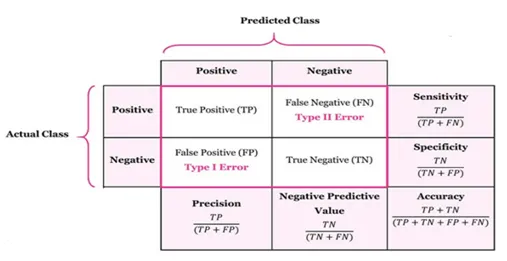

* Precision: The precision is the ratio of true positive predictions to the total predicted positives. It indicates the accuracy of the positive predictions.

* Recall (Sensitivity): Recall is the ratio of true positive predictions to the total actual positives. It measures the ability of the model to capture all the relevant cases. It is also called the true positive rate

* F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

In [ ]:
x

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,49.223744,14,4.690416,71.285324,0.521649,8.834025,2,31335.476824,3,0.651423
12128,62.465753,10,5.196152,72.288058,0.651106,9.194564,2,26024.711057,2,0.593591
2181,63.059361,13,4.000000,66.362808,0.567983,8.880315,7,39269.053927,3,0.057999
5946,48.082192,11,3.000000,74.703737,0.580542,9.043782,3,42771.499200,1,0.460139
9054,26.484018,13,5.000000,47.948952,0.735622,8.784077,3,35509.228515,2,0.420575
...,...,...,...,...,...,...,...,...,...,...
11493,56.118721,8,1.000000,63.445761,0.694521,8.867920,5,38537.363408,2,0.161708
305,40.365297,10,2.645751,62.169553,0.649442,8.931405,4,40846.916900,2,0.273676
612,27.853881,17,1.000000,69.598906,0.564160,8.964932,3,33771.996300,3,0.410089


In [ ]:
x.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [ ]:
dict1 = {'Safety_Score':10, 'Days_Since_Inspection': 30, 'Total_Safety_Complaints':10,
       'Control_Metric':20, 'Turbulence_In_gforces':0.88, 'Cabin_Temperature': 4.4,
       'Accident_Type_Code':2, 'Max_Elevation':30000, 'Violations':4,
       'Adverse_Weather_Metric':0.77}

list1 = []

for i,j in dict1.items():
  list1.append(j)


#Since we have 10 features
user_input_values = np.array(list1).reshape(1,-1)
user_input_values

array([[1.0e+01, 3.0e+01, 1.0e+01, 2.0e+01, 8.8e-01, 4.4e+00, 2.0e+00,
        3.0e+04, 4.0e+00, 7.7e-01]])

In [ ]:
user_input_features_scaled = sc.transform(user_input_values)  # 'sc' is our scaling object from StandardScaler() above

In [ ]:
severity_prediction = rfc.predict(user_input_features_scaled)

In [ ]:
predicted_severity = severity_prediction[0]

print(f"The predicted severity is: {predicted_severity}")

The predicted severity is: 3


We use the below for our reference

```
{'Highly_Fatal_And_Damaging':1, 'Minor_Damage_And_Injuries':2, 'Significant_Damage_And_Fatalities':3, 'Significant_Damage_And_Serious_Injuries':4}
```

